# Titanic Survival Prediction
## Исследовательский анализ данных (Exploratory Data Analysis (EDA))

В этом ноутбуке мы исследуем данные о пассажирах Titanic: посмотрим структуру датасета, проверим пропуски, визуализируем основные зависимости.


In [219]:
# ======================
# 1. Импорт библиотек
# ======================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [220]:
# ======================
# 2. Загрузка данных
# ======================

df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

# Приводим названия колонок к нижнему регистру и snake_case
#df_train.columns = df_train.columns.str.strip().str.lower().str.replace(" ", "_")
#df_test.columns = df_test.columns.str.strip().str.lower().str.replace(" ", "_")

In [221]:
print("\nПервые 5 строк train:")
display(df_train.head())


Первые 5 строк train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
# =========================
# 3. Базовый анализ данных
# =========================
print("------Training Data Information-------\n")
df_train.info()

print("------Test Data Information------\n")
df_test.info()

------Training Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------Test Data Information------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----

In [223]:
print("\nОсновные статистические данные в train:")
df_train.describe()


Основные статистические данные в train:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
# ===========================
#  Дубликаты
# ===========================
print("\nКоличество дубликатов в train:", df_train.duplicated().sum())


Количество дубликатов в train: 0


In [225]:
# ===========================
#  Пропущенные значения
# ===========================
print("\nПропущенные значения в train:")
missing = df_train.isnull().sum()
missing_percent = (missing / len(df_train)) * 100
missing_table = pd.DataFrame({
    'Missing Values': missing,
    '% of Total Values': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_table)


Пропущенные значения в train:
             Missing Values  % of Total Values
Cabin                   687          77.104377
Age                     177          19.865320
Embarked                  2           0.224467
PassengerId               0           0.000000
Name                      0           0.000000
Pclass                    0           0.000000
Survived                  0           0.000000
Sex                       0           0.000000
Parch                     0           0.000000
SibSp                     0           0.000000
Fare                      0           0.000000
Ticket                    0           0.000000


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


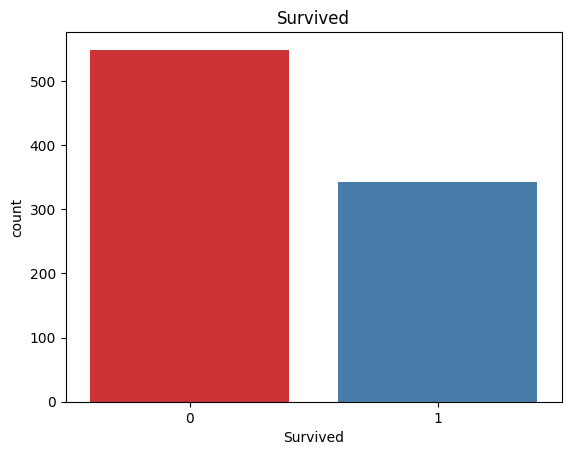

In [226]:
# ======================
#  4. Анализ целевой
#  переменной (Survived)
# ======================

print(df_train["Survived"].value_counts(normalize=True))

sns.countplot(x="Survived", data=df_train, hue="Survived", palette="Set1", legend=False)
plt.title("Survived")
plt.show()

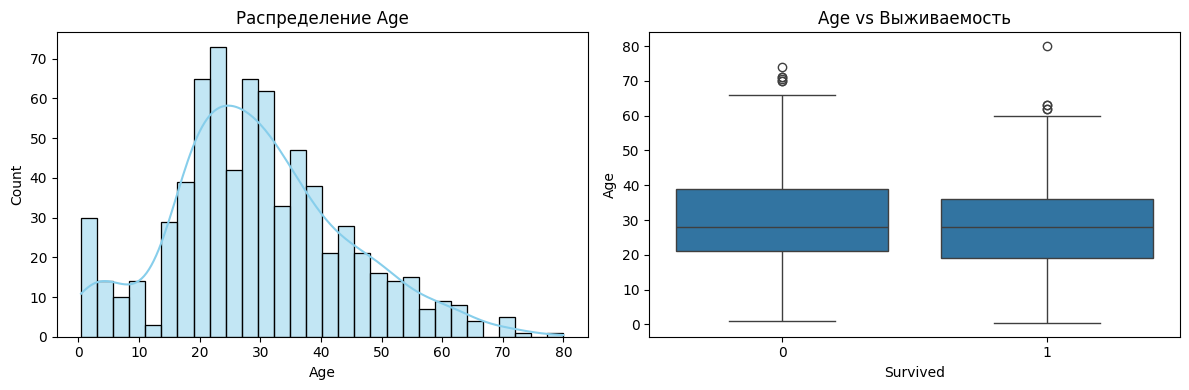

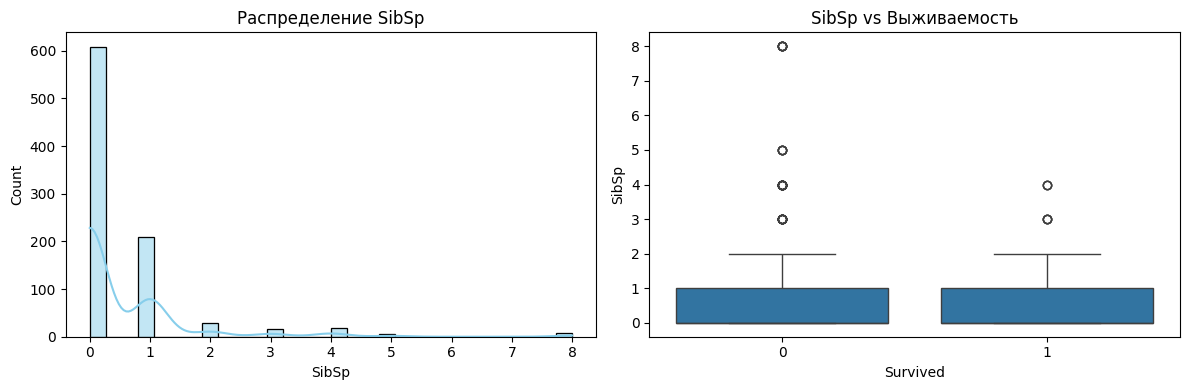

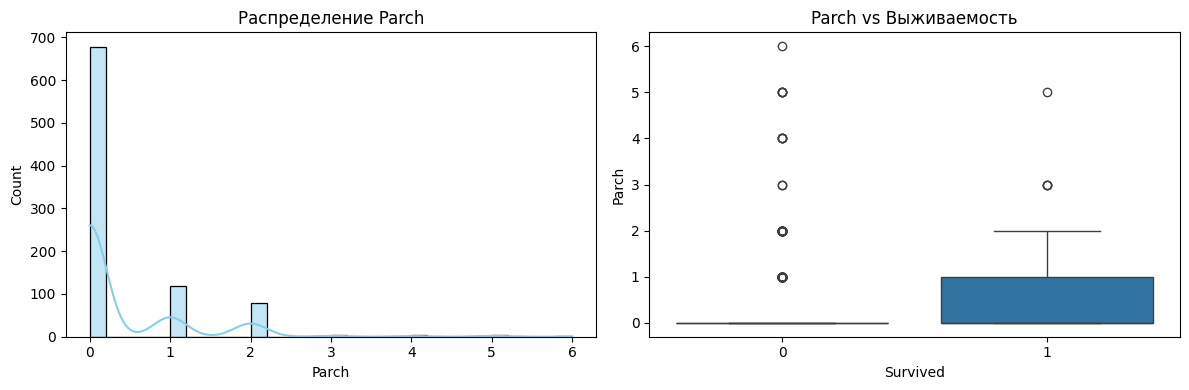

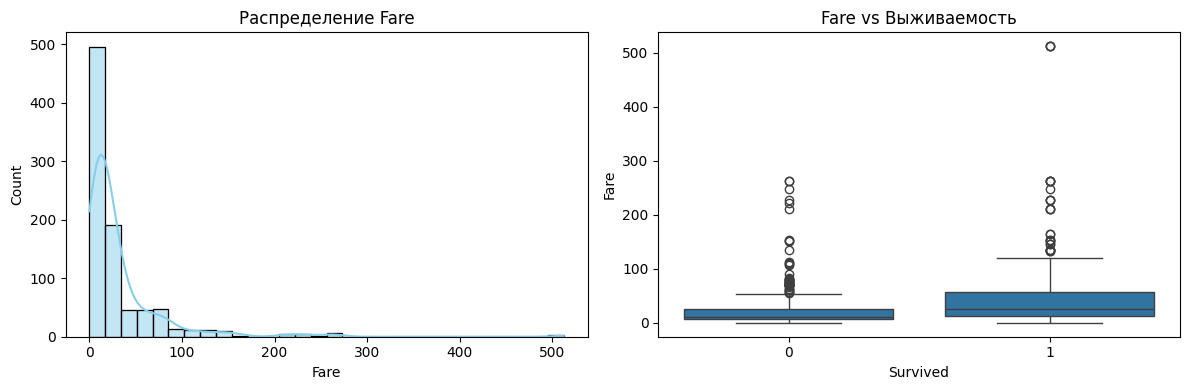

In [227]:
# ===========================
#  5. Числовые признаки
# ===========================
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Гистограмма
    sns.histplot(df_train[col], bins=30, kde=True, color="skyblue", edgecolor="black", ax=axes[0])
    axes[0].set_title(f"Распределение {col}")
    axes[0].set_xlabel(col)

    # Boxplot по Survived
    sns.boxplot(x="Survived", y=col, data=df_train, ax=axes[1])
    axes[1].set_title(f"{col} vs Выживаемость")

    plt.tight_layout()
    plt.show()

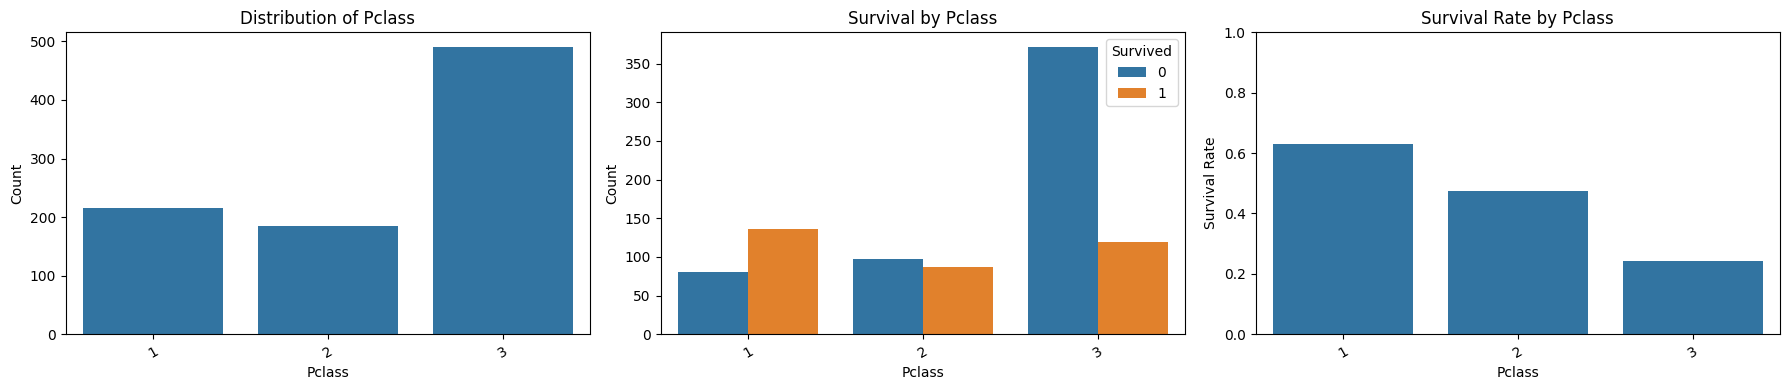

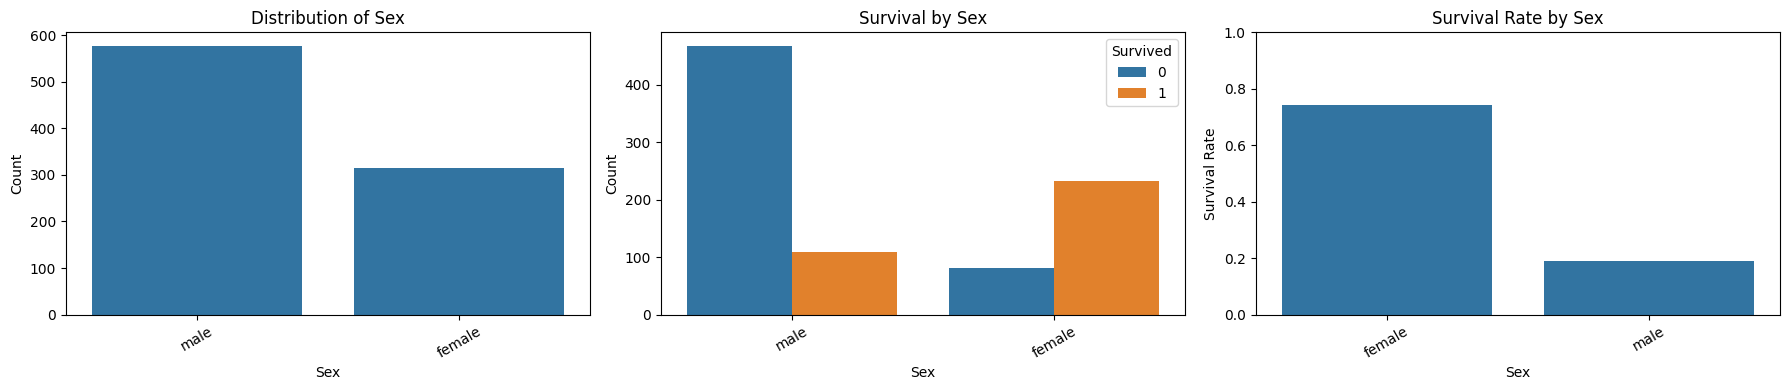

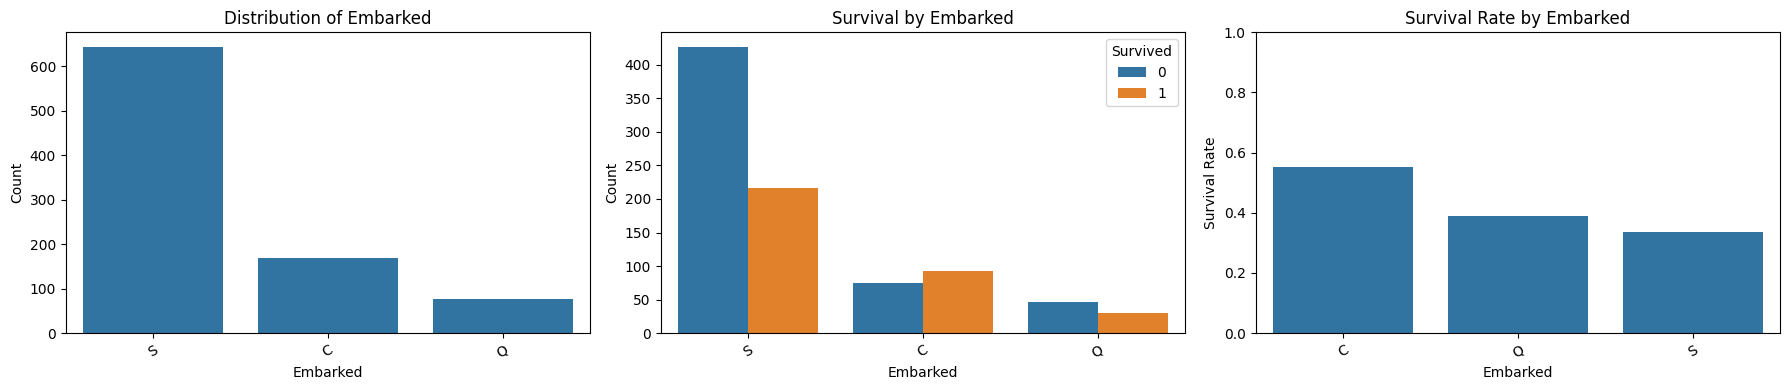

In [228]:
# ===========================
#  6. Категориальные признаки
# ===========================
cat_cols = ["Pclass", "Sex", "Embarked"]

for col in cat_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    
    # 1. Просто распределение
    sns.countplot(x=col, data=df_train, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=30)
    
    # 2. Распределение по целевой
    sns.countplot(x=col, hue="Survived", data=df_train, ax=axes[1])
    axes[1].set_title(f"Survival by {col}")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Count")
    axes[1].tick_params(axis='x', rotation=30)
    
    # 3. Барплот с процентом выживших
    survival_rate = df_train.groupby(col)["Survived"].mean().reset_index()
    sns.barplot(x=col, y="Survived", data=survival_rate, ax=axes[2])
    axes[2].set_title(f"Survival Rate by {col}")
    axes[2].set_xlabel(col)
    axes[2].set_ylabel("Survival Rate")
    axes[2].tick_params(axis='x', rotation=30)
    axes[2].set_ylim(0,1)  # шкала от 0 до 100%
    
    plt.tight_layout()
    plt.show()

Выводы:
1. В датасете (train.csv) 891 наблюдение и 12 признаков + целевой признак (Survived). Есть пропущенные значения: Age (~20%), Cabin (~77%) и Embarked (2 значения). Пропуски нужно учитывать перед моделированием (заполнить медианой/модой или удалить).
2. Целевая переменная.
    - Распределение Survived: ~38% выживших, ~62% погибших.
    - Задача классификации умеренно несбалансирована, стандартные метрики (accuracy, F1) применимы.
4. Числовые признаки.
    - Age: средний возраст ~29 лет, есть выбросы; дети выживали чаще.
    - Fare: сильно скошено вправо; пассажиры с дорогими билетами выживали чаще.
    - SibSp/Parch: большинство 0, семьи больших размеров (≥4) выживали хуже.
    - Age, Fare и Pclass — самые важные числовые признаки для модели, SibSp/Parch лучше объединить в новый признак FamilySize.
5. Категориальные признаки.
    - Sex: женщины выживали гораздо чаще мужчин.
    - Embarked: пассажиры из Cherbourg (C) имели больше шансов выжить, чем из Southampton (S).
    - Pclass: 1-й класс выживал чаще, 3-й — реже.

## Создание признаков (Feature Engineering)

In [229]:
# Копируем данные
train = df_train.copy()
test = df_test.copy()

def create_features(df):
    df = df.copy()
    
    # --- Age ---
    df["Age"] = df.groupby(["Pclass","Sex"])["Age"].transform(lambda x: x.fillna(x.median()))
    
    # --- AgeGroup ---
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','YoungAdult','Adult','Senior'])
    
    # --- Deck ---
    df["Deck"] = df["Cabin"].str[0].fillna("Unknown")
    
    # --- FamilySize & IsAlone ---
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
    df['FamilySizeCat'] = pd.cut(df['FamilySize'], bins=[0,1,4,11], labels=['Alone','Small','Large'])
    # --- Title ---
    df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
    df["Title"] = df["Title"].replace(['Lady','Countess','Capt','Col','Don','Dr','Major',
                                       'Rev','Sir','Jonkheer','Dona'], 'Rare')
    df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms":1, "Mme":1, "Mlle":1, 
                                   "Mr":2, "Mrs":1, "Rare":3}).fillna(3)
    
    # --- Заполняем медианой по Pclass и Embarked ---
    df['Fare'] = df.groupby(['Pclass','Embarked'])['Fare'].transform(lambda x: x.fillna(x.median()))
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    # --- Fare_log ---
    df["Fare_log"] = np.log1p(df["Fare"])

    # --- Embarked ---
    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
        
    # --- Удаляем ненужные колонки ---
    df = df.drop(columns=["Cabin","Name","Ticket","PassengerId"], errors='ignore')
    
    return df

train = create_features(train)
test = create_features(test)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Deck,FamilySize,IsAlone,FamilySizeCat,Title,Fare_log
0,0,3,male,22.0,1,0,7.2500,S,YoungAdult,Unknown,2,0,Small,2,2.110213
1,1,1,female,38.0,1,0,71.2833,C,Adult,C,2,0,Small,1,4.280593
2,1,3,female,26.0,0,0,7.9250,S,YoungAdult,Unknown,1,1,Alone,1,2.188856
3,1,1,female,35.0,1,0,53.1000,S,YoungAdult,C,2,0,Small,1,3.990834
4,0,3,male,35.0,0,0,8.0500,S,YoungAdult,Unknown,1,1,Alone,2,2.202765


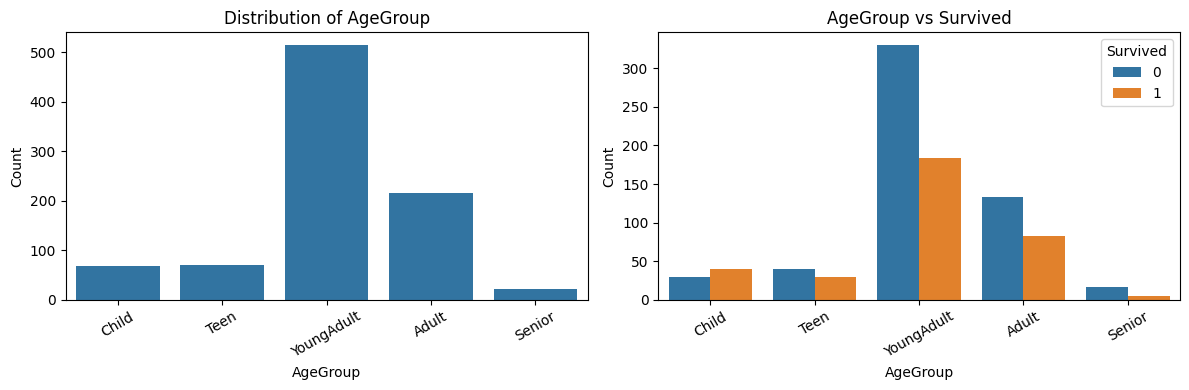

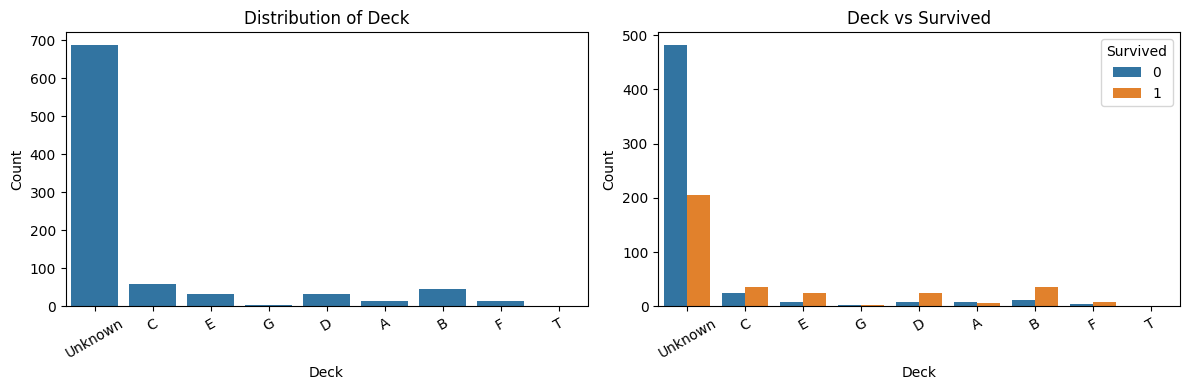

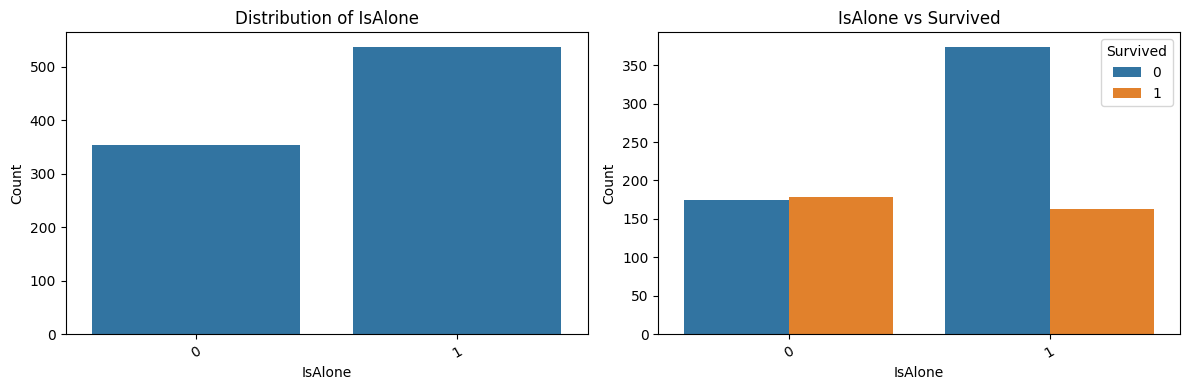

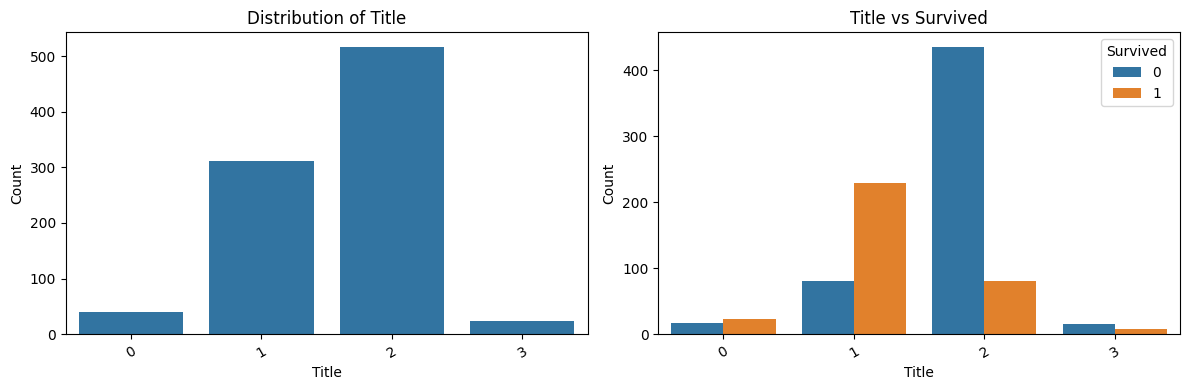

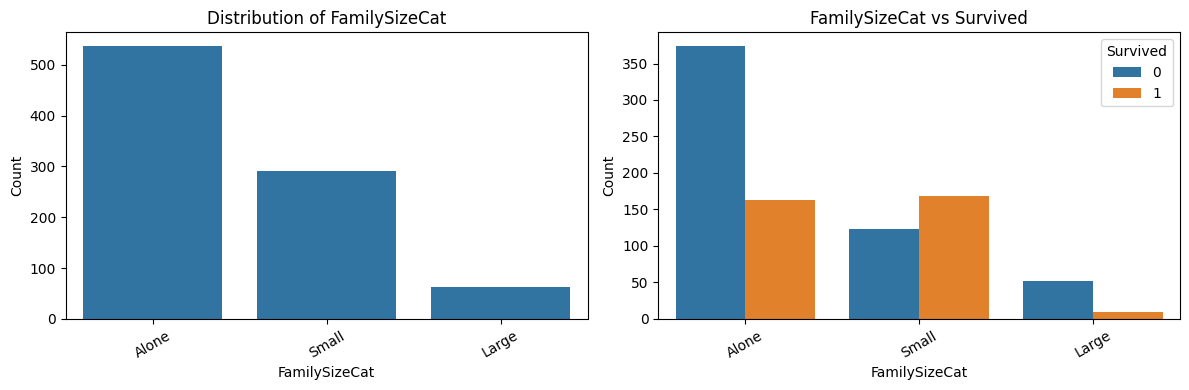

In [230]:
new_cat_cols = ["AgeGroup", "Deck", "IsAlone", "Title", "FamilySizeCat"]

for col in new_cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    
    # Распределение признака
    sns.countplot(x=col, data=train, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=30)
    
    # Распределение по Survived
    sns.countplot(x=col, hue="Survived", data=train, ax=axes[1])
    axes[1].set_title(f"{col} vs Survived")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Count")
    axes[1].tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()


Выводы по разделу Feature Engineering:

1. Созданы новые признаки, которые потенциально могут улучшить качество модели:
    - FamilySize (число членов семьи на борту) — позволяет учитывать социальные связи пассажира
    - IsAlone (флаг одиночки) — помогает учесть влияние путешествия в одиночку
    - Title (титул из имени) — выделяет социальный статус и может коррелировать с выживаемостью
    - Deck (палуба из Cabin) — косвенно отражает расположение каюты на корабле
    - Fare_log (логарифм тарифа) — уменьшает влияние выбросов и делает распределение более нормальным
2. Признаки преобразованы в более информативную форму:
    - Категориальные значения сгруппированы и закодированы.
    - Признак Fare трансформирован логарифмом для снижения влияния выбросов.
3. Для Cabin пропуски интерпретированы как отдельная категория "Unknown".
Цель этапа достигнута: данные стали более структурированными и содержат дополнительные информативные признаки, которые могут улучшить обучение модели.

 ## Предобработка данных перед моделированием

In [231]:
# --- Кодирование категориальных признаков ---
cat_cols = ["Sex","Pclass","Embarked","Deck","AgeGroup","Title","IsAlone","FamilySizeCat"]
combined = pd.concat([train.drop(columns=["Survived"]), test], axis=0)
combined = pd.get_dummies(combined, columns=cat_cols, drop_first=True)

# Разделяем обратно
X_train = combined.iloc[:train.shape[0], :]
X_test = combined.iloc[train.shape[0]:, :]
y_train = train["Survived"]

# --- Масштабирование числовых признаков ---
num_cols = ["Age","SibSp","Parch","Fare_log"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (891, 29)
Test shape: (418, 29)


C:\Users\yurlo\AppData\Local\Temp\ipykernel_21216\3063396182.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\yurlo\AppData\Local\Temp\ipykernel_21216\3063396182.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = scaler.transform(X_test[num_cols])


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Разделение train ---
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# --- 2. Logistic Regression ---
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_part, y_train_part)
y_val_lr = lr.predict(X_val)

print("Logistic Regression (Validation):")
print("Accuracy:", accuracy_score(y_val, y_val_lr))
print("F1-score:", f1_score(y_val, y_val_lr))
print(confusion_matrix(y_val, y_val_lr))
print(classification_report(y_val, y_val_lr))

# --- 3. Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_part, y_train_part)
y_val_rf = rf.predict(X_val)

print("\nRandom Forest (Validation):")
print("Accuracy:", accuracy_score(y_val, y_val_rf))
print("F1-score:", f1_score(y_val, y_val_rf))
print(confusion_matrix(y_val, y_val_rf))
print(classification_report(y_val, y_val_rf))

# --- 4. XGBoost ---
xgb = XGBClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=3, 
    random_state=42, eval_metric='logloss'
)
xgb.fit(X_train_part, y_train_part)
y_val_xgb = xgb.predict(X_val)

print("\nXGBoost (Validation):")
print("Accuracy:", accuracy_score(y_val, y_val_xgb))
print("F1-score:", f1_score(y_val, y_val_xgb))
print(confusion_matrix(y_val, y_val_xgb))
print(classification_report(y_val, y_val_xgb))

# --- 5. Финальное обучение на полном train и предсказание test ---
final_models = {
    "LogisticRegression": lr.fit(X_train, y_train),
    "RandomForest": rf.fit(X_train, y_train),
    "XGBoost": xgb.fit(X_train, y_train)
}

predictions = {}
for name, model in final_models.items():
    predictions[name] = model.predict(X_test)

# --- 6. Пример сохранения сабмита для Kaggle ---
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": predictions["XGBoost"]  # например, XGBoost
})
submission.to_csv("submission.csv", index=False)


Logistic Regression (Validation):
Accuracy: 0.8324022346368715
F1-score: 0.7761194029850746
[[97 13]
 [17 52]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Random Forest (Validation):
Accuracy: 0.8212290502793296
F1-score: 0.7538461538461538
[[98 12]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


XGBoost (Validation):
Accuracy: 0.7988826815642458
F1-score: 0.7272727272727273
[[95 15]
 [21 48]]
              precision    re